# Exploring US Data Flights Exercise Solutions

* Below are 5 asnwers for all the questions asked in flights.ipynb.
* The code assumes that the files "515364771_T_ONTIME_REPORTING.csv" and "L_UNIQUE_CARRIERS.csv" are located in the same folder as this notebook.
* Each exercise reads the dataset anew, so they can be run independantly.

> Dimitrios Stefanou <br />
> Α.Μ. 3160245

## Question 1

* We are called to present 3 tables. The first contains the number of delays along with chance of having a delayed flight for every airport in the dataset.
* The dataset contains a multitude of cells without actual data (NaN values). Since we will only be utilising the origin and departure delay columns, we will exclusively check for NaN values in the latter.
* We proceed to count the total number of flights. This number will be used to find the probability of delay later.
* We remove the flights with no delay, along with the outliers, by grouping the airports by their origin name and using the quantile function.
* We now create a dataframe for the "misery index", the airports sorted by their number of delayed flights. 
* To illustrate the probabiities easier, we round them up, reducing the number of decimal places

In [2]:
import pandas as pd
import numpy as np

# QUESTION 1
# read datatset and create index. Remove unnecessary columns
# DEP_DELAY appears to contain the sum of the specific delays mentioned on the rest of the columns
# since we only care about the sum, we can safely drop the rest
dataset = pd.read_csv("515364771_T_ONTIME_REPORTING.csv", sep=",")
df = dataset.set_index(['ORIGIN'])

# update the dataframe, dropping NaN values from the DEP_DELAY column. make note of the total flights
df = df[np.isfinite(df.DEP_DELAY)]
flight_num = len(df)

# remove flights with no departure delay, along with the outliers
df = df.loc[df.DEP_DELAY  >  0]
df = df.loc[df.groupby('ORIGIN').size() > df.groupby('ORIGIN').size().quantile(0.01)]

# create new dataframe that will contain the misery index, along with the average and median delay of each airport
# first add the number of delays of each airport
flights = df.groupby('ORIGIN').size().to_frame()
flights.columns = ['NUMBER OF DELAYS']

# next, calculate the chance of delay
flights['CHANCE OF DELAY'] = (flights['NUMBER OF DELAYS']/flight_num).round(3)
flights = flights.sort_values(by = ['CHANCE OF DELAY'], ascending = False)
flights

,NUMBER OF DELAYS,CHANCE OF DELAY
ORIGIN,,
ATL,141182,0.020
ORD,112855,0.016
DFW,100994,0.014
DEN,88915,0.013
CLT,88139,0.012
LAX,77640,0.011
PHX,67482,0.010
SFO,61505,0.009
LAS,65858,0.009


* We return on the original dataframe to calculate the mean and median values of the delayed flights.
* We group the airlines by their origin name and use mean()/median() on their respective departure delay cells
* These values are stored and shown from a new dataframe, sorted by the average delay column.

In [4]:
# calculate the average and median delay of each airport
mean_med = pd.DataFrame(columns = ['MEAN', 'MEDIAN'])
mean_med['MEAN'] = df.groupby('ORIGIN')['DEP_DELAY'].mean().round(1)
mean_med['MEDIAN'] = df.groupby('ORIGIN')['DEP_DELAY'].median()

# sort by average
mean_med = mean_med.sort_values(by = ['MEAN'], ascending = False)
mean_med

,MEAN,MEDIAN
ORIGIN,,
DVL,138.4,43.0
PPG,106.4,19.0
JMS,104.9,31.0
CMX,99.8,37.5
RHI,96.8,32.0
LWB,95.6,36.5
SLN,94.3,32.0
SHD,89.9,32.0
CKB,88.9,36.0


* With the two dataframes in hand, we concatenate and sort them by the airport's chance of a delayed flight.

In [5]:
# concatenate the two dataframes and sort by the probability of having a delayed departure
airport_delay = pd.concat([flights, mean_med], sort = False, axis = 1).reindex(flights.index)
airport_delay = airport_delay.sort_values(by = ['CHANCE OF DELAY'], ascending = False)
airport_delay

,NUMBER OF DELAYS,CHANCE OF DELAY,MEAN,MEDIAN
ORIGIN,,,,
ATL,141182,0.020,32.1,14.0
ORD,112855,0.016,43.9,22.0
DFW,100994,0.014,40.1,19.0
DEN,88915,0.013,34.4,15.0
CLT,88139,0.012,33.9,15.0
LAX,77640,0.011,32.2,15.0
PHX,67482,0.010,29.7,14.0
SFO,61505,0.009,40.0,20.0
LAS,65858,0.009,30.9,14.0


## Question 2

* For this question, we will be mostly using the same code as above.
* Instead of aiports, we will be presenting airline carriers.
* We will also read the full name of the airlines from another cvs file. For each dataframe we create, we will merge those names with the airline codes.

In [6]:
# QUESTION 2
import pandas as pd
import numpy as np

# create a dataframe with a new index to represent the carriers
# also load carrier names from another csv file
df = pd.read_csv("515364771_T_ONTIME_REPORTING.csv", sep=",")
df = df.set_index(['CARRIER'])
carrier_names = pd.read_csv("L_UNIQUE_CARRIERS.csv", sep=",")
carrier_names = carrier_names.rename(columns = {'Code' : 'CARRIER'}).set_index('CARRIER')

# update the dataframe, dropping NaN values from the DEP_DELAY column. make note of the total flights
df = df[np.isfinite(df.DEP_DELAY)]
flight_num = len(df)

# remove flights with no departure delay. this time we keep the outliers
df = df.loc[df.DEP_DELAY  >  0]

# create new dataframe that will contain the misery index, along with the average and median delay of each carrier
# first add the number of delays of each carrier
carriers = df.groupby('CARRIER').size().to_frame()
carriers.columns = ['NUMBER OF DELAYS']

# next, calculate the chance of delay
carriers['CHANCE OF DELAY'] = (carriers['NUMBER OF DELAYS']/flight_num).round(3)
# include the names of the carriers by merginf the two dataframes
carriers = carriers.merge(carrier_names, how = 'inner', on = 'CARRIER')
carriers = carriers[['Description', 'NUMBER OF DELAYS', 'CHANCE OF DELAY']].rename(columns = {'Description' : 'CARRIER NAME'})
# sort the carriers by their chance of havinf a delay and print
carriers = carriers.sort_values(by = ['CHANCE OF DELAY'], ascending = False)
carriers

,CARRIER NAME,NUMBER OF DELAYS,CHANCE OF DELAY
CARRIER,,,
WN,Southwest Airlines Co.,662363,0.093
AA,American Airlines Inc.,317751,0.045
DL,Delta Air Lines Inc.,286165,0.040
OO,SkyWest Airlines Inc.,203193,0.029
UA,United Air Lines Inc.,185249,0.026
B6,JetBlue Airways,125011,0.018
OH,PSA Airlines Inc.,100247,0.014
MQ,Envoy Air,83546,0.012
YX,Republic Airline,75839,0.011


* Same code once more, only our mean/median dataframe is merged with the airline names' dataframe.

In [7]:
# calculate the average and median delay of each carrier
mean_med_c = pd.DataFrame(columns = ['MEAN', 'MEDIAN'])
mean_med_c['MEAN'] = df.groupby('CARRIER')['DEP_DELAY'].mean().round(1)
mean_med_c['MEDIAN'] = df.groupby('CARRIER')['DEP_DELAY'].median()

# sort by average
mean_med_c = mean_med_c.sort_values(by = ['MEAN'], ascending = False)
# include the names of the carriers
mean_med_c = mean_med_c.merge(carrier_names, how = 'inner', on = 'CARRIER')
mean_med_c = mean_med_c[['Description', 'MEAN', 'MEDIAN']].rename(columns = {'Description' : 'CARRIER NAME'})
mean_med_c

,CARRIER NAME,MEAN,MEDIAN
CARRIER,,,
EV,ExpressJet Airlines LLC,61.9,31.0
OO,SkyWest Airlines Inc.,54.7,24.0
9E,Endeavor Air Inc.,53.9,25.0
YV,Mesa Airlines Inc.,51.6,23.0
F9,Frontier Airlines Inc.,50.9,25.0
G4,Allegiant Air,49.6,22.0
B6,JetBlue Airways,47.0,24.0
YX,Republic Airline,46.8,25.0
NK,Spirit Air Lines,46.7,19.0


* As in question 1, the final dataframe concatenates the previous two, now merged with the airline names.

In [8]:
# concatenate the two dataframes and sort by the probability of having a delayed departure
carrier_delay = pd.concat([carriers, mean_med_c], sort = False, axis = 1).reindex(carriers.index)
carrier_delay = carrier_delay.sort_values(by = ['CHANCE OF DELAY'], ascending = False)
# include the names of the carriers
carrier_delay = carrier_delay.merge(carrier_names, how = 'inner', on = 'CARRIER')
carrier_delay = carrier_delay[['Description', 'NUMBER OF DELAYS', 'CHANCE OF DELAY', 'MEAN', 'MEDIAN']].rename(columns = {'Description' : 'CARRIER NAME'})
carrier_delay

,CARRIER NAME,NUMBER OF DELAYS,CHANCE OF DELAY,MEAN,MEDIAN
CARRIER,,,,,
WN,Southwest Airlines Co.,662363,0.093,25.4,12.0
AA,American Airlines Inc.,317751,0.045,37.1,16.0
DL,Delta Air Lines Inc.,286165,0.040,33.6,13.0
OO,SkyWest Airlines Inc.,203193,0.029,54.7,24.0
UA,United Air Lines Inc.,185249,0.026,45.3,20.0
B6,JetBlue Airways,125011,0.018,47.0,24.0
OH,PSA Airlines Inc.,100247,0.014,40.1,17.0
MQ,Envoy Air,83546,0.012,39.5,20.0
YX,Republic Airline,75839,0.011,46.8,25.0


## Question 3

* To create the histogram, first we read our dataset and as before, drop the NaN values in the departure delay column.
* We also drop all the unecessary columns of the dataset, keeping only the origin and destination columns.
* We group those by origin name and count the number of flights for each one.
* Finally, we create the histogram.

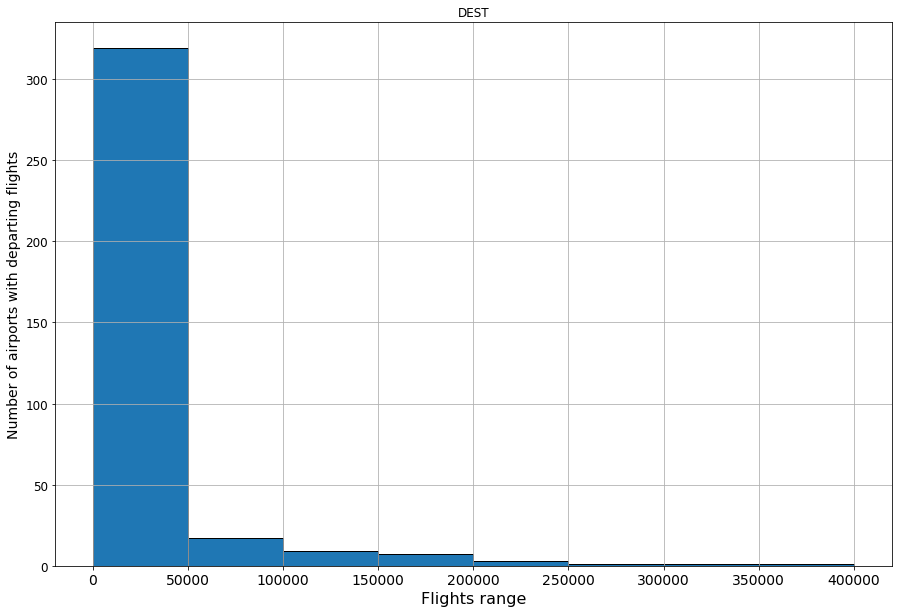

In [10]:
# QUESTION 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create the dataframe
df = pd.read_csv("515364771_T_ONTIME_REPORTING.csv", sep=",")

# update the dataframe, dropping NaN values from the DEP_DELAY column.
df = df[np.isfinite(df['DEP_DELAY'])]

df = df[['ORIGIN', 'DEST']].set_index('ORIGIN')
df = df.groupby('ORIGIN').count()

df.hist(bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000], edgecolor = 'black', figsize = [15, 10])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 12)
plt.xlabel("Flights range", fontsize=16)
plt.ylabel("Number of airports with departing flights", fontsize=14)
plt.show()

## Question 4

* To create this plot, first we will create a new dataframe with the two necessary columns.
* This time, we'll be keeping the fl_date column, after we parse it with parse_dates. This will allow us to group flights based on their dates.
* "Number of flights" will be filled with the total number of flights of every airport, for each month.
* "Number of delayed flights" will only count the delayed flights of every airport, for each month.
* Before we create our plot, we write a list with month names. We'll use them as tick labels on the x-axis of the plot.
* We create the plot and use a couple of matplotlib function to better visualise the data.

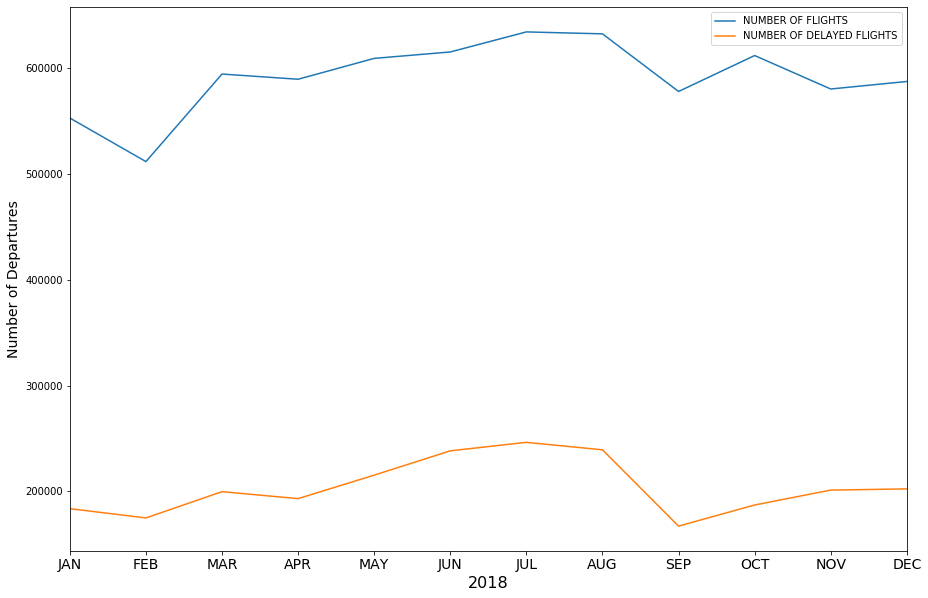

In [13]:
# QUESTION 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create the dataframe. parse_dates parses the given dates of the FL_date column and allows 
# for easier grouping of our data in months
df = pd.read_csv("515364771_T_ONTIME_REPORTING.csv", sep=",", parse_dates = ['FL_DATE'])

# update the dataframe, dropping NaN values from the DEP_DELAY column.
df = df[np.isfinite(df['DEP_DELAY'])]

# fill the dataframe with the number of flights and the number of delays for each month
pf = pd.DataFrame(columns = ['NUMBER OF FLIGHTS', 'NUMBER OF DELAYED FLIGHTS'])
pf['NUMBER OF FLIGHTS'] = df.groupby(df['FL_DATE'].dt.month).size()
pf['NUMBER OF DELAYED FLIGHTS'] = df.loc[df['DEP_DELAY']  >  0].groupby(df['FL_DATE'].dt.month).size()

# create plot, replace x-axis labels with months (instead of index numbers)
months = ['JAN','FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
pf_plot = pf.plot(x_compat = True, figsize = [15, 10])
pf_plot.set_xticklabels(months)
plt.xticks([x for x in range(1, 13)], fontsize = 14)
plt.xlabel("2018", fontsize = 16)
plt.ylabel("Number of Departures", fontsize = 14)
plt.show()

## Question 5

* After the usual preprocessing, we keep the four columns that concern our problem: Carrier code, origin and destination names and the departure delay.
* We group the first three and find the mean values of the delays.
* We sort those values and then keep only the first one for each origin-dest-carrier.
* Meaning, we now have the carrier with the best mean delay for the specific origin - destination set.
* We remove the carrier from the index of the table (we'll be using it on the next cell).
* We print the first 25 rows of our resulting table.

In [9]:
# QUESTION 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create the default dataframe
df = pd.read_csv("515364771_T_ONTIME_REPORTING.csv", sep=",")

# update the dataframe, dropping NaN values from the DEP_DELAY column.
df = df[np.isfinite(df['DEP_DELAY'])]

df = df[['CARRIER', 'ORIGIN', 'DEST', 'DEP_DELAY']].set_index(['ORIGIN', 'DEST'])
df = df.groupby(['ORIGIN', 'DEST', 'CARRIER']).mean().round(2).rename(columns = {'DEP_DELAY' : 'AVERAGE DELAY OF CARRIER'})
df = df.sort_values(['ORIGIN', 'DEST', 'AVERAGE DELAY OF CARRIER'], ascending = True)
df = df[~df.index.get_level_values(1).duplicated()]
df = df.reset_index(level = ['CARRIER'])
df.head(25)

CARRIER  AVERAGE DELAY OF CARRIER
ORIGIN DEST                                  
ABE    ATL       DL                      7.53
       CLT       OH                      5.06
       DTW       OO                     15.95
       FLL       G4                     40.71
       MDT       OO                    175.00
       MYR       G4                      7.89
       ORD       OO                     12.91
       PGD       G4                     16.28
       PHL       OH                      9.29
       PIE       G4                     13.05
       SFB       G4                     15.49
ABI    DFW       MQ                      8.03
ABQ    AUS       F9                     10.91
       BWI       WN                     10.85
       DAL       WN                     10.11
       DEN       OO                      2.73
       HOU       WN                      8.36
       IAH       YX                      0.13
       JFK       B6                      9.59
       LAS       WN                      9.29
       LAX       OO                      7.43
       MCI       WN                     11.05
       MCO       F9                      8.73
       MDW       WN                      9.22
       MSP       DL                     -0.96

* The above table is obviously not that useful on its current state. Finding a specific row can be time consuming.
* Below is a piece of code that recieves input (the desired origin and destination set) and searches the dataframe for the best carrier.
* The input is case-agnostic.

In [ ]:
# user can now search for the best airline code for a specific origin-destination point
print("Enter the origin code of your departure airport")
org = input().upper()
print("Enter the destination code of your destination")
dest = input().upper()
print("Finding best airline carrier...\n")
answer = df.loc[(df.index.get_level_values(0) == org) & (df.index.get_level_values(1) == dest)]
if answer.empty:
    print("No carrier found! Origin/Destination might not exist. Check for mistakes on your input.")
else:
    print(answer)